In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns
from google.colab import drive

drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# !ls "/content/drive/My Drive"
df = pd.read_csv('/gdrive/My Drive/Data Science - Group 11/global_power_plant_database.csv')

df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,http://globalenergyobservatory.org,GEODB,1009793,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,NaN,NaN,NaN,Wiki-Solar,https://www.wiki-solar.org,Wiki-Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,NaN,NaN,NaN,Wiki-Solar,https://www.wiki-solar.org,Wiki-Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,http://globalenergyobservatory.org,GEODB,1009795,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,http://globalenergyobservatory.org,GEODB,1009797,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


[Text(0, 0, 'Solar'),
 Text(0, 0, 'Hydro'),
 Text(0, 0, 'Wind'),
 Text(0, 0, 'Gas'),
 Text(0, 0, 'Coal'),
 Text(0, 0, 'Oil'),
 Text(0, 0, 'Biomass'),
 Text(0, 0, 'Waste'),
 Text(0, 0, 'Nuclear'),
 Text(0, 0, 'Geothermal'),
 Text(0, 0, 'Storage'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Cogeneration'),
 Text(0, 0, 'Petcoke'),
 Text(0, 0, 'Wave and Tidal')]

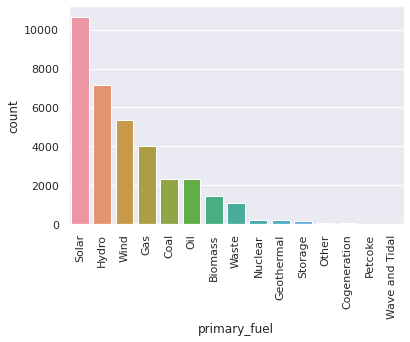

In [ ]:
# Exploratory Data Analysis

df['primary_fuel'].unique()

# Barchart to determine plant distribution by type
sns.set(color_codes=True)
plot = sns.countplot(x="primary_fuel", data=df, order = df['primary_fuel'].value_counts().index)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

In [ ]:
df[df['primary_fuel'] == "Solar"].describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017
count,10665.000000,10665.000000,10665.000000,3500.000000,3450.000000,633.000000,937.000000,1252.000000,1819.000000,2299.000000,2726.000000,3260.000000,7633.000000,7906.000000,8272.000000,8605.000000,10665.000000
mean,17.657039,37.712596,-0.781163,2015.690287,2018.876812,13.954062,18.128063,21.622091,21.401820,24.180779,23.430987,21.979277,34.646962,35.228476,34.975659,34.599176,32.590749
std,41.939412,14.456022,76.043135,2.952006,0.585077,45.172392,72.907004,102.535522,91.564976,87.835224,75.133900,69.463887,80.909089,83.598470,83.639603,83.506455,78.788926
min,1.000000,-40.771900,-159.762100,1987.000000,2013.000000,-0.116000,-0.064000,0.000000,-41.889000,-0.394000,0.000000,0.000000,1.120000,0.870000,1.210000,0.570000,0.570000
25%,2.600000,34.543900,-75.808300,2014.000000,2019.000000,1.653300,1.624000,1.906500,1.933235,1.999500,2.098500,2.103750,6.150000,5.950000,5.657500,5.420000,4.110000
50%,5.800000,40.086000,0.809500,2016.000000,2019.000000,2.835000,3.029000,3.663500,3.969000,4.231000,4.537500,4.291500,13.500000,13.410000,12.480000,12.030000,10.130000
75%,18.000000,46.355000,72.388000,2018.000000,2019.000000,8.138000,8.544000,9.082250,9.495500,9.889500,9.559750,9.564500,33.730000,33.670000,33.020000,32.780000,31.500000
max,1021.000000,67.665800,153.110000,2020.000000,2019.000000,675.525000,1105.857000,2203.325000,2290.606000,2022.002000,1335.727000,1255.722000,1901.610000,2056.060000,2069.290000,2012.710000,1876.420000


In [ ]:
# Explore data about geothermal plants

df_gt = df[df['primary_fuel'] == 'Geothermal']


df_gt.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017
count,189.000000,189.000000,189.000000,143.000000,79.000000,58.000000,59.000000,62.000000,64.000000,63.000000,63.000000,65.000000,0.0,0.0,0.0,0.0,158.000000
mean,67.130952,29.559103,-12.623095,1998.005683,2018.582278,261.721122,264.049305,267.354919,264.499344,256.944270,254.503254,239.164692,NaN,NaN,NaN,NaN,380.352468
std,114.640890,20.703692,100.988530,12.245848,0.928296,621.357150,589.304270,576.427069,580.935179,590.110359,586.914846,540.487651,NaN,NaN,NaN,NaN,682.548458
min,1.000000,-38.666400,-154.888400,1966.000000,2016.000000,0.000000,1.525000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000
25%,18.200000,19.479000,-115.616700,1989.333333,2019.000000,75.752250,77.418000,74.106000,71.566750,64.503500,74.709500,67.933000,NaN,NaN,NaN,NaN,111.380000
50%,30.000000,37.884500,10.800300,1998.000000,2019.000000,129.643850,138.508000,126.935000,136.240000,124.895000,124.602000,115.179000,NaN,NaN,NaN,NaN,150.825000
75%,80.000000,41.482800,36.333800,2009.000000,2019.000000,322.267250,310.149000,327.845250,275.044250,306.015500,304.042500,300.512000,NaN,NaN,NaN,NaN,396.635000
max,1163.000000,65.703500,176.727200,2019.000000,2019.000000,4784.939000,4591.707000,4531.168000,4628.971000,4667.659000,4674.308000,4351.429000,NaN,NaN,NaN,NaN,6286.450000


In [ ]:
!pip install --upgrade geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Populating the interactive namespace from numpy and matplotlib


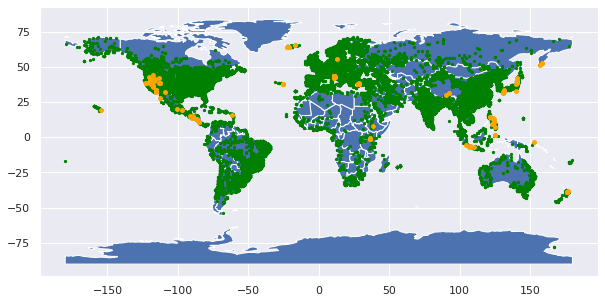

In [ ]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

df_everythingelse = df[df['primary_fuel'] != 'Geothermal']

geometry = [Point(xy) for xy in zip(df_gt['longitude'], df_gt['latitude'])]
gdf = GeoDataFrame(df_gt, geometry=geometry)
gdf2 = GeoDataFrame(df_everythingelse, geometry = [Point(xy) for xy in zip(df_everythingelse['longitude'], df_everythingelse['latitude'])])

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

%pylab inline
ax = world.plot(figsize(10, 6))
gdf2.plot(ax=ax, marker='o', color='green', markersize=5);
gdf.plot(ax=ax, marker='o', color='orange', markersize=15);

In [ ]:
df_gdp = pd.read_csv('/gdrive/My Drive/Data Science - Group 11/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_4701247.csv', skiprows=3)

df_gdp = df_gdp.loc[:, ~df_gdp.columns.str.contains('^Unnamed')]
df_gdp["2021"] = df_gdp["2021"].fillna(df_gdp["2020"])

df_gdp.head()

In [ ]:
df_gdp['Country Name'].unique()

df_gdp.describe().T

,count,mean,std,min,25%,50%,75%,max
1960,133.0,7.144431e+10,2.139668e+11,1.201201e+07,5.083344e+08,2.760747e+09,3.115666e+10,1.392053e+12
1961,135.0,7.227617e+10,2.216008e+11,1.159201e+07,5.111424e+08,2.899655e+09,2.963396e+10,1.448393e+12
1962,137.0,7.591834e+10,2.362059e+11,9.122751e+06,5.317365e+08,2.814319e+09,2.906074e+10,1.550299e+12
1963,137.0,8.187843e+10,2.541180e+11,1.084010e+07,5.161478e+08,3.540403e+09,3.368764e+10,1.671347e+12
1964,137.0,8.993111e+10,2.779094e+11,1.271247e+07,5.425784e+08,3.405333e+09,3.097945e+10,1.829999e+12
1965,148.0,9.131323e+10,2.918706e+11,1.359393e+07,5.863716e+08,3.038595e+09,2.848916e+10,1.993587e+12
1966,151.0,1.016025e+11,3.195597e+11,1.446908e+07,6.380995e+08,3.170500e+09,3.024408e+10,2.163555e+12
1967,155.0,1.048530e+11,3.369514e+11,1.583518e+07,6.264909e+08,3.384063e+09,3.076550e+10,2.302168e+12
1968,160.0,1.099793e+11,3.588648e+11,1.460000e+07,6.454036e+08,4.064739e+09,3.420281e+10,2.484824e+12
1969,160.0,1.216207e+11,3.949848e+11,1.585000e+07,6.912229e+08,4.759106e+09,3.741952e+10,2.740743e+12


In [ ]:
df_tectonic = pd.read_csv("/gdrive/My Drive/Data Science - Group 11/plate_tectonics.csv")

df_tectonic.head()

12321

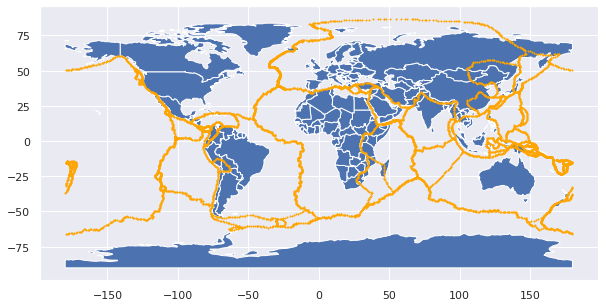

In [ ]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(df_tectonic['lon'], df_tectonic['lat'])]
gdf3 = GeoDataFrame(df_tectonic, geometry=geometry)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf3.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='orange', markersize=0.5);

In [ ]:
# Get the distance from power plant to closest tectonic boundary
# Plot regression line between that & total output.
# Maybe also put an additional line for thresholds of other energy sources

import geopy.distance
import math

def get_min_distance(latitude, longitude):
  min_dist = 9999
  min_index = 0
  for index, row in df_tectonic.iterrows():
    distance = np.linalg.norm(np.array((latitude, longitude)) - np.array((row["lat"], row["lon"])))
    if distance < min_dist:
      min_index = index
      min_dist = distance
  return (min_index, min_dist)

In [ ]:
get_min_distance(df_gt.iloc[0]["latitude"], df_gt.iloc[0]["longitude"])

(3626, 4.41287380852886)

In [ ]:
from sklearn.neighbors import KDTree, BallTree

kd = KDTree(df_tectonic[["lat", "lon"]].values, metric = 'euclidean')
distances, indices = kd.query(df_gt[["latitude", "longitude"]], k=1)
print(distances[0], indices[0])

for column in df_gt[["latitude", "longitude"]]:
    rad = np.deg2rad(df_gt[column].values)
    df_gt[f'{column}_rad'] = rad
for column in df_tectonic[["lat", "lon"]]:
    rad = np.deg2rad(df_tectonic[column].values)
    df_tectonic[f'{column}_rad'] = rad

# df_gt.head()

ball = BallTree(df_tectonic[["lat", "lon"]].values, metric = 'haversine')
distances, indices = ball.query(df_gt[["latitude", "longitude"]], k=1)
print(distances[0], indices[0])
distances_1d = []
for row in distances:
  distances_1d.append(row[0])

df_gt = df_gt.reset_index()
distance_frame = pd.DataFrame(distances_1d, columns=["Closest Plate Distance"])
df_gt = df_gt.join(distance_frame)

[4.41287381] [4702]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


[0.00813788] [9248]


-0.013593629789375283
32.5907491795593 494.89108580212405


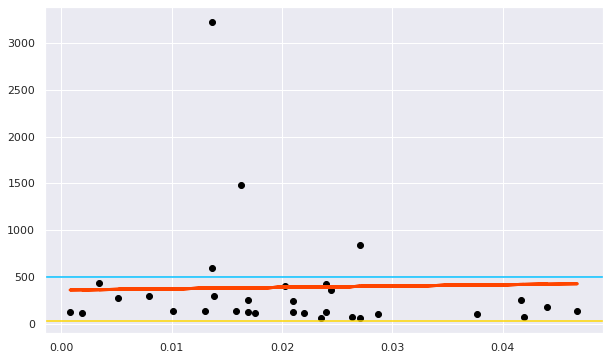

In [ ]:
# Construct linear model here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

geothermal_df = df_gt[df_gt['estimated_generation_gwh_2017'].notna()]
# geothermal_df = geothermal_df.loc[:,["estimated_generation_gwh_2017", "Closest Plate Distance"]]
# geothermal_df.head()

X = geothermal_df["Closest Plate Distance"]
y = geothermal_df["estimated_generation_gwh_2017"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
lm = LinearRegression().fit(X_train, y_train)

pred_y = lm.predict(X_test)

plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, pred_y, color="orangered", linewidth=3)
print(r2_score(y_test, pred_y))

# Get average estimated generation for solar and hydro
solar_df = df[df['primary_fuel'] == 'Solar']
solar_df = solar_df[solar_df['estimated_generation_gwh_2017'].notna()]
average_solar = solar_df['estimated_generation_gwh_2017'].mean()

hydro_df = df[df['primary_fuel'] == 'Hydro']
hydro_df = hydro_df[hydro_df['estimated_generation_gwh_2017'].notna()]
average_hydro = hydro_df['estimated_generation_gwh_2017'].mean()
print(average_solar, average_hydro)

plt.axhline(y=average_solar, color='gold', linestyle='-')
plt.axhline(y=average_hydro, color='deepskyblue', linestyle='-')

plt.show()

In [ ]:
plant_series = df_gt['country_long'].value_counts()
df_plant = pd.DataFrame({'Country Name':plant_series.index, 'Total Plants': plant_series.values})

df_countries = df_gdp[["Country Name", "2021"]]
df_cluster = pd.merge(df_plant, df_countries, on='Country Name')
# df_plant
US_GDP = df_countries[df_countries["Country Name"] == "United States"]["2021"].values[0]
US_plants = df_plant[df_plant["Country Name"] == "United States of America"]["Total Plants"].values[0]
Russia_GDP = df_countries[df_countries["Country Name"] == "Russian Federation"]["2021"].values[0]
Russia_plants = df_plant[df_plant["Country Name"] == "Russia"]["Total Plants"].values[0]
Turkey_GDP = df_countries[df_countries["Country Name"] == "Turkiye"]["2021"].values[0]
Turkey_plants = df_plant[df_plant["Country Name"] == "Turkey"]["Total Plants"].values[0]

df_cluster.loc[len(df_cluster.index)] = ['United States', US_plants, US_GDP] 
df_cluster.loc[len(df_cluster.index)] = ['Russia', Russia_plants, Russia_GDP]
df_cluster.loc[len(df_cluster.index)] = ['Turkey', Turkey_plants, Turkey_GDP]

df_cluster.rename(columns={"2021":"GDP in 2021"}, inplace=True)
df_cluster

,Country Name,Total Plants,GDP in 2021
0,Italy,33,2.099880e+12
1,Japan,14,4.937422e+12
2,Indonesia,10,1.186093e+12
3,Philippines,9,3.940864e+11
4,New Zealand,7,2.499915e+11
5,Kenya,6,1.103471e+11
6,Iceland,6,2.545893e+10
7,Costa Rica,5,6.428244e+10
8,Mexico,5,1.293038e+12
9,Portugal,2,2.498865e+11


Italy    33    2099880198258.88
Japan    14    4937421880461.55
Indonesia    10    1186092991320.04
Mexico    5    1293037866360.17
China    2    17734062645371.4
France    1    2937472757953.44
United States    65    22996100000000.0
Russia    3    1775799919352.98
Turkey    11    815271751724.423


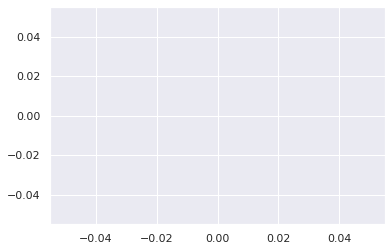

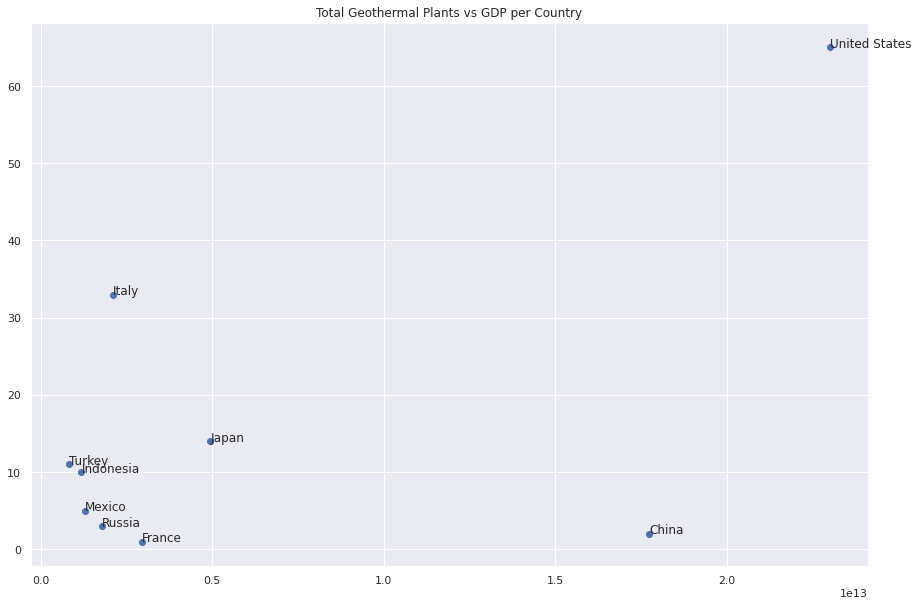

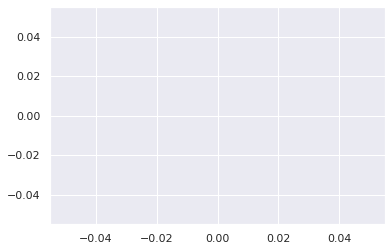

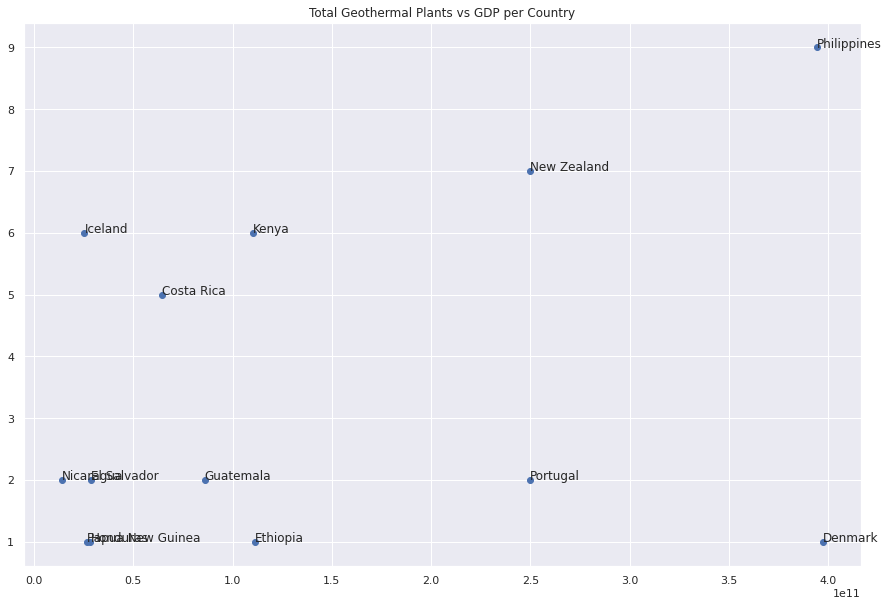

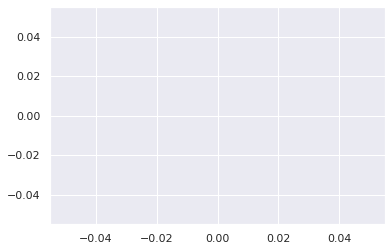

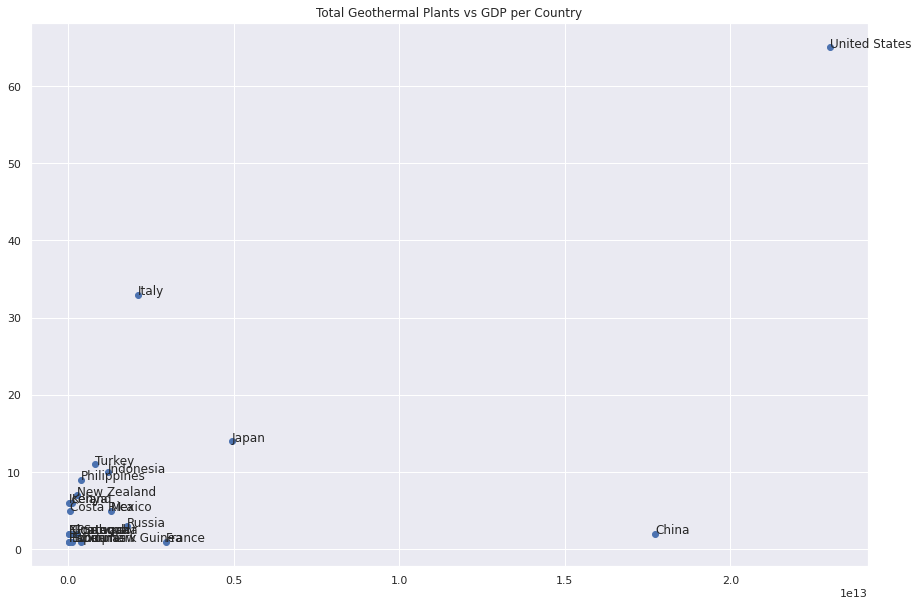

In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

#using elbow test from https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

df_cluster_large = pd.DataFrame(df_cluster[df_cluster['Country Name'].isin(['Italy','Japan','China','United States','France','Turkey','Russia','Indonesia','Mexico'])])
df_cluster_large = df_cluster_large.reset_index()
#print(df_cluster_large)

df_cluster_small = df_cluster[df_cluster['Country Name'].isin(['Philippines','New Zealand','Kenya','Iceland','Costa Rica','Portugal','Nicaragua','El Salvador','Guatemala','Ethiopia','Papua New Guinea','Denmark','Honduras'])]
df_cluster_small = df_cluster_small.reset_index()
#print(df_cluster_small)

#plotting the points of df_cluster
plt.plot()
plt.figure(figsize=(15,10)) 
plt.title('Total Geothermal Plants vs GDP per Country')
plt.scatter(df_cluster_large["GDP in 2021"],df_cluster_large["Total Plants"])
for i, label in enumerate(df_cluster_large["Country Name"]):
    print(label, "  ", df_cluster_large["Total Plants"][i], "  ", df_cluster_large["GDP in 2021"][i])
    plt.annotate(label, (df_cluster_large["GDP in 2021"][i],df_cluster_large["Total Plants"][i]))
plt.show()

#plotting the points of df_cluster
plt.plot()
plt.figure(figsize=(15,10)) 
plt.title('Total Geothermal Plants vs GDP per Country')
plt.scatter(df_cluster_small["GDP in 2021"],df_cluster_small["Total Plants"])
for i, label in enumerate(df_cluster_small["Country Name"]):
    plt.annotate(label, (df_cluster_small["GDP in 2021"][i],df_cluster_small["Total Plants"][i]))
plt.show()

#plotting the points of df_cluster
plt.plot()
plt.figure(figsize=(15,10)) 
plt.title('Total Geothermal Plants vs GDP per Country')
plt.scatter(df_cluster["GDP in 2021"],df_cluster["Total Plants"])
for i, label in enumerate(df_cluster["Country Name"]):
    plt.annotate(label, (df_cluster["GDP in 2021"][i],df_cluster["Total Plants"][i]))
plt.show()

In [ ]:
#obtaining values for distortions and inertias
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

df_kmeans = df_cluster[["GDP in 2021","Total Plants"]]
df_labels = df_cluster["Country Name"]
  
for k in K:
    # Building and fitting the model
    km = KMeans(n_clusters=k).fit(df_kmeans)
    km.fit(df_kmeans)
  
    distortions.append(sum(np.min(cdist(df_kmeans, km.cluster_centers_,
                                        'euclidean'), axis=1)) / df_kmeans.shape[0])
    inertias.append(km.inertia_)
  
    mapping1[k] = sum(np.min(cdist(df_kmeans, km.cluster_centers_,
                                   'euclidean'), axis=1)) / df_kmeans.shape[0]
    mapping2[k] = km.inertia_

1 : 3467213677966.7593
2 : 1073759711043.8113
3 : 648062461043.9341
4 : 408878944924.4521
5 : 227060538525.5052
6 : 153703487700.55035
7 : 107850609520.66641
8 : 67487861110.21311
9 : 46634223483.81404


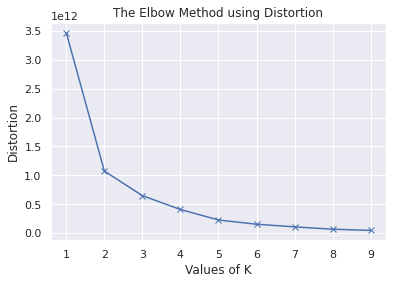

1 : 7.375029240301512e+26
2 : 4.447049452688946e+25
3 : 2.250268646491473e+25
4 : 8.658167904161348e+24
5 : 2.659618710285242e+24
6 : 1.076197224467387e+24
7 : 4.1002020233076273e+23
8 : 2.1149785125980108e+23
9 : 9.148110163290326e+22


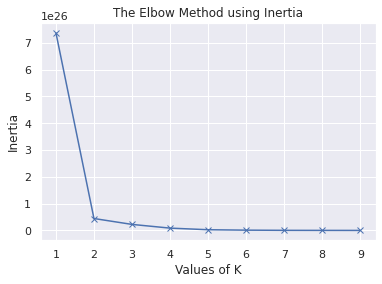

In [ ]:
#visualizing results for distortion
for key, val in mapping1.items():
    print(f'{key} : {val}')

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

#visualizing results for inertia
for key, val in mapping2.items():
    print(f'{key} : {val}')

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

(4, 2)


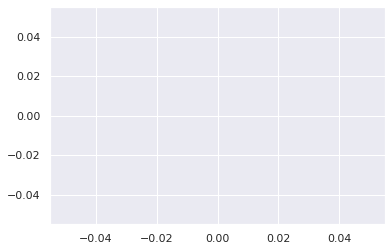

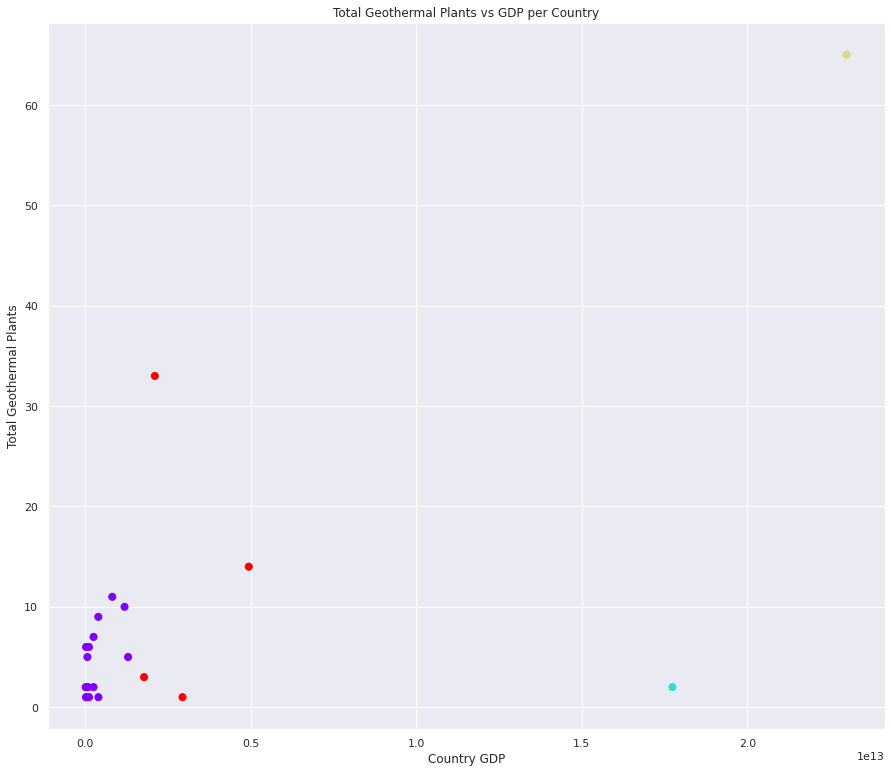

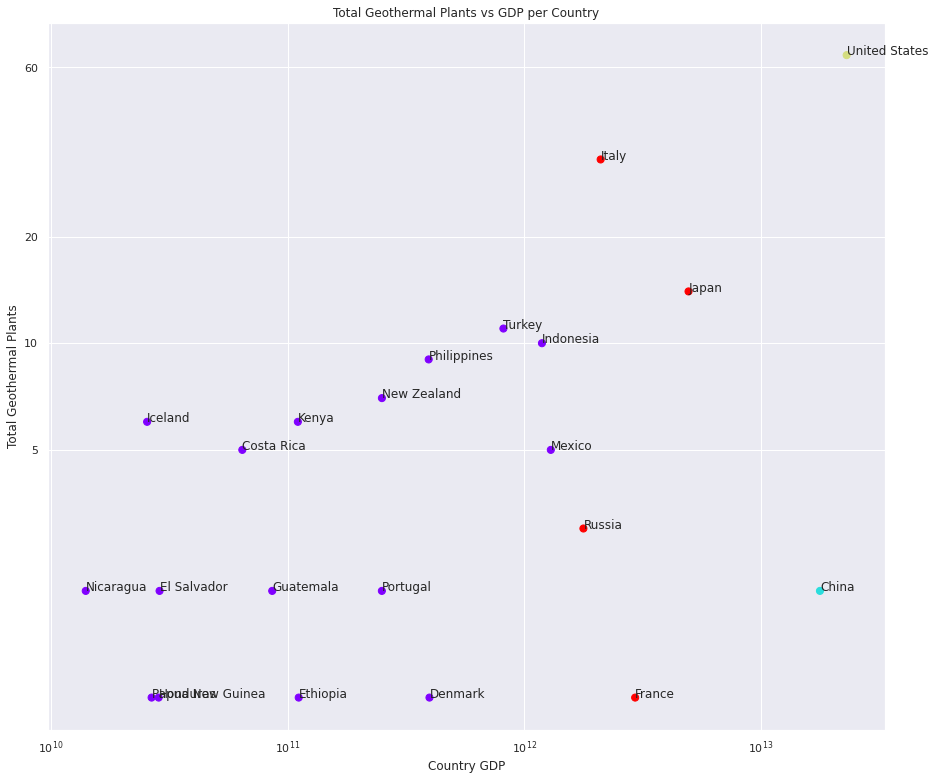

In [ ]:
#the optimal number of clusters is 2
# df_cluster = df_cluster.drop(columns=["Country Name"])
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(df_kmeans)
print(kmeans.cluster_centers_.shape)

plt.plot()
plt.figure(figsize=(15,13)) 
plt.title('Total Geothermal Plants vs GDP per Country')
plt.ylabel('Total Geothermal Plants')
plt.xlabel('Country GDP')
labels = KMeans(n_clusters=4, random_state=42).fit_predict(df_kmeans)
plt.scatter(df_kmeans.iloc[:, 0], df_kmeans.iloc[:, 1], c=labels, s=50, cmap='rainbow');


plt.plot()
plt.figure(figsize=(15,13)) 
plt.title('Total Geothermal Plants vs GDP per Country')
plt.ylabel('Total Geothermal Plants')
plt.xlabel('Country GDP')
plt.yscale("log")
y_ticks = [0,5,10, 20, 60]
y_labels = [0,5,10, 20, 60] 
plt.yticks(ticks=y_ticks, labels=y_labels)

x_ticks = [0, 0.25, 0.5, 1, 2]
x_labels = [0, 0.25, 0.5, 1, 2] 
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.xscale("log")

labels = KMeans(n_clusters=4, random_state=42).fit_predict(df_kmeans)
plt.scatter(df_kmeans.iloc[:, 0], df_kmeans.iloc[:, 1], c=labels, s=50, cmap='rainbow');
for i, label in enumerate(df_cluster["Country Name"]):
    plt.annotate(label, (df_cluster["GDP in 2021"][i], df_cluster["Total Plants"][i]))
plt.show()